# Assignment 45 - Mar 21' 23 - Feature Engineering 5

### Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you might choose one over the other.

* Ordinal Encoding and Label Encoding are both encoding techniques used in data preprocessing, but they differ in the type of data they are best suited for.

* Label Encoding is a technique that assigns a unique numerical value to each categorical variable in a dataset. For example, if we have a categorical variable "color" with the values "red", "green", and "blue", we can encode them as 0, 1, and 2, respectively. Label Encoding does not take into account any ordering or hierarchy in the categorical variables, and the encoded values are arbitrary.

* On the other hand, Ordinal Encoding is a technique that assigns numerical values to categorical variables based on their order or hierarchy. For example, if we have a categorical variable "size" with the values "small", "medium", and "large", we can encode them as 0, 1, and 2, respectively. In this case, the encoded values reflect the order of the categories.

* When to use Ordinal Encoding versus Label Encoding depends on the specific context and the nature of the categorical variable being encoded. If the categorical variable has a natural ordering or hierarchy, such as in the case of "size", then Ordinal Encoding may be more appropriate. On the other hand, if the categorical variable has no inherent ordering, such as in the case of "color", then Label Encoding may be more appropriate.

* For example, if we were encoding data for a clothing store, we might use Ordinal Encoding for the "size" variable, as there is a natural ordering to the sizes. However, for the "color" variable, we would use Label Encoding, as there is no inherent order to the colors.

### Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in a machine learning project.

* Target Guided Ordinal Encoding is a technique used to encode categorical variables based on their relationship with the target variable in a supervised machine learning problem. The basic idea is to assign a numerical value to each category of the categorical variable based on the mean or median target value for that category. The categories with the highest target value are assigned the highest numerical value, and the categories with the lowest target value are assigned the lowest numerical value.

* For example, let's say we have a dataset of customer information for a bank, including a categorical variable "education" with categories "high school", "college", and "graduate school", and a target variable indicating whether or not the customer defaulted on a loan. To perform Target Guided Ordinal Encoding, we would group the data by each category of "education" and calculate the mean or median target value for each group. We would then assign a numerical value to each category based on its mean or median target value. The category with the highest target value would be assigned the highest numerical value, and the category with the lowest target value would be assigned the lowest numerical value.

* In a machine learning project, Target Guided Ordinal Encoding can be used when the categorical variable has a strong relationship with the target variable and the goal is to improve the predictive power of the model. For example, if we are building a model to predict customer loan default, the "education" variable may be a good candidate for Target Guided Ordinal Encoding, as it is likely to be a strong predictor of loan default. By encoding the variable based on its relationship with the target, we may be able to improve the accuracy of our model. However, it is important to note that Target Guided Ordinal Encoding can lead to overfitting if not used carefully, and should be used in conjunction with other encoding techniques and feature selection methods.

![Target Guided Ordinal Encoding](https://miro.medium.com/v2/resize:fit:1400/1*8lK9mSxuPJ4b9SUXA3dN-A.png)

### Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?

* Covariance is a statistical measure that quantifies the degree of co-variation between two random variables. It measures how much two variables move together, and can be used to understand the relationship between them. Specifically, covariance measures the tendency of two variables to vary together in a linear fashion: if the values of one variable tend to increase as the values of the other variable increase, their covariance will be positive; if one variable tends to increase as the other variable decreases, their covariance will be negative.

* Covariance is important in statistical analysis because it is a measure of the strength and direction of the relationship between two variables. For example, it can be used to study the relationship between a stock and the overall market, the relationship between education level and income, or the relationship between age and health. By understanding the covariance between two variables, we can gain insights into the nature of their relationship and use that knowledge to make better decisions.

* The formula for calculating the covariance between two random variables X and Y is:

$$\text{cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$

where n is the number of observations, $x_i$ and $y_i$ are the values of X and Y for the i-th observation, $\bar{x}$ and $\bar{y}$ are the sample means of X and Y, respectively.

This formula calculates the covariance as the average of the product of the deviations of each observation from their respective means. The term $\frac{1}{n-1}$ is the sample correction factor, which adjusts for the fact that sample covariance tends to underestimate population covariance.

If the covariance is positive, it means that X and Y tend to increase or decrease together, while a negative covariance means that X tends to increase as Y decreases (or vice versa). A covariance of zero indicates that there is no linear relationship between the two variables.

![Cov](https://dpbnri2zg3lc2.cloudfront.net/en/wp-content/uploads/2021/05/positive_negative_weak_covariance.jpg)

#### Below is example of how covariance is calculated in python:

In [1]:
# Loading iris dataset
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
covar = iris.cov(numeric_only=True)
covar

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


<AxesSubplot: >

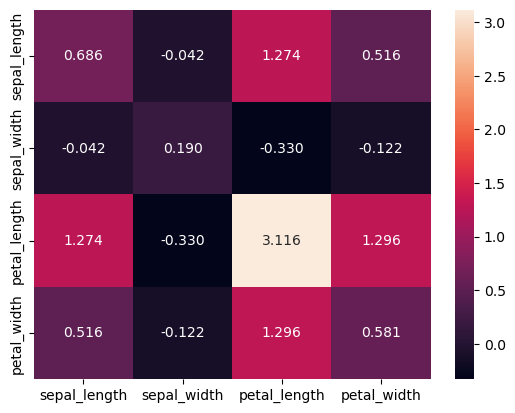

In [3]:
sns.heatmap(covar,annot=True,fmt=".3f")

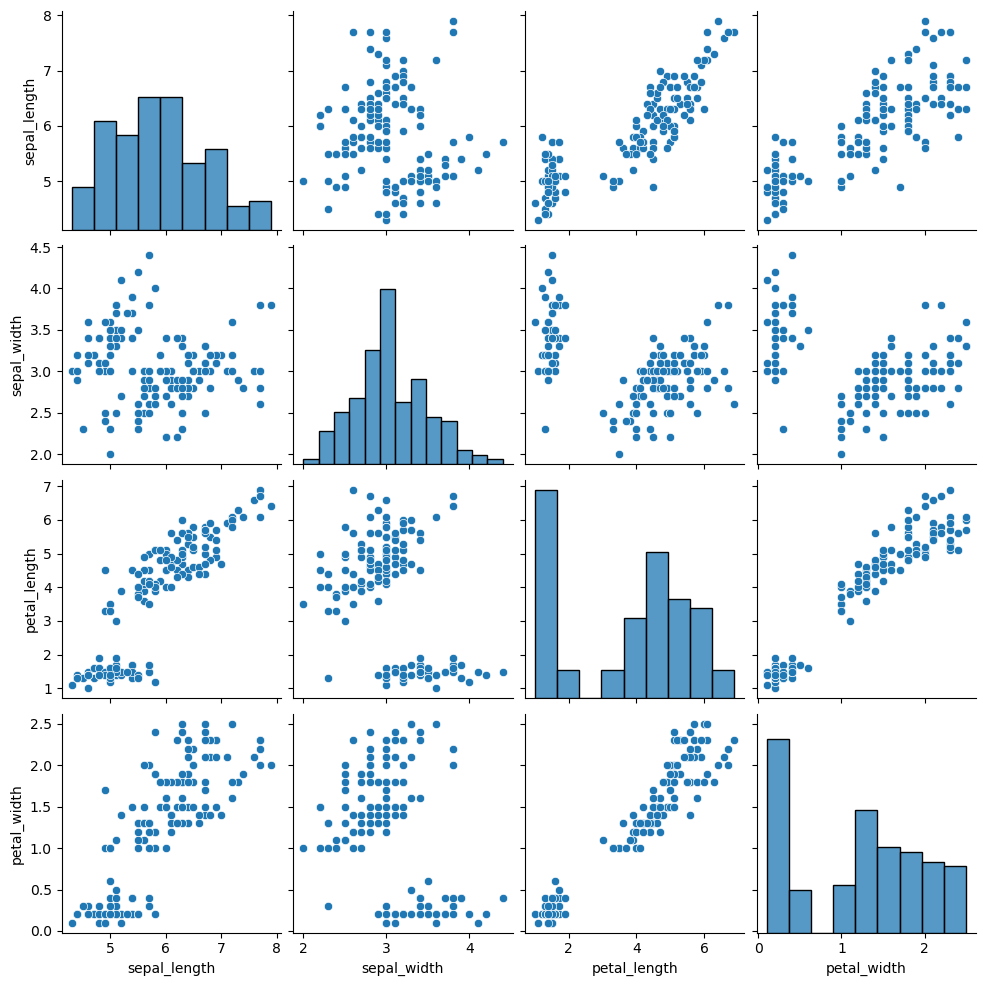

In [4]:
sns.pairplot(iris)

#### Above Pairplot and Covariance shows positive, negative and zero covariances 

### Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium,large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library. Show your code and explain the output.

#### To perform label encoding for the given dataset, we can use the LabelEncoder class from scikit-learn's preprocessing module. Here is an example code: 

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the data as a list of lists
data = [['red', 'small', 'wood'],
        ['green', 'medium', 'metal'],
        ['blue', 'large', 'plastic'],
        ['red', 'small', 'plastic']]

# Define the column names
columns = ['Color', 'Size', 'Material']

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)

# Print Dataframe before encoding
print(f'Dataframe Before Encoding :\n {df}')
print('\n=================================\n')

# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to each column in the DataFrame
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Print the encoded DataFrame
print(f'Dataframe After Encoding :\n {df}')

Dataframe Before Encoding :
    Color    Size Material
0    red   small     wood
1  green  medium    metal
2   blue   large  plastic
3    red   small  plastic


Dataframe After Encoding :
    Color  Size  Material
0      2     2         2
1      1     1         0
2      0     0         1
3      2     2         1


* In the encoded dataset, each categorical variable has been replaced with numerical values. For example, 'red' is encoded as 2, 'green' as 1, and 'blue' as 0 for the 'Color' variable. Similarly, 'small' is encoded as 2, 'medium' as 0, and 'large' as 1 for the 'Size' variable, and 'wood' is encoded as 2, 'metal' as 1, and 'plastic' as 0 for the 'Material' variable.

* This encoding is done based on alphabetical order eg. blue = 0 , green = 1 , red = 2

* Note that the encoded values have no inherent meaning or order. They are simply numerical representations of the original categorical variables.

### Q5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education level. Interpret the results.

#### Below is example python code with synthetically generated data

In [6]:
import numpy as np
import pandas as pd

# Setting random seed 
np.random.seed(765)

# Generating synthetic data
n = 1000
age = np.random.randint(low=25,high=60,size=n)
education_level = np.random.choice(['High School','Bachelor','Masters','PhD'],size=n)
income = 1200*age + np.random.normal(loc=0, scale=5000,size=n)

# Storing in dataframe
df = pd.DataFrame(
    {'age':age,
     'education_level':education_level,
     'income':income}
)

df.head()

,age,education_level,income
0,54,Masters,64428.015536
1,51,Masters,54313.962387
2,29,High School,34920.177216
3,52,Bachelor,68267.339595
4,42,High School,48145.405198


#### Apply Ordinal Encoding on Education variable

In [7]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['High School','Bachelor','Masters','PhD']])
edu_endoded = encoder.fit_transform(df[['education_level']])
df['education_level']=np.ravel(edu_endoded)
df.head()

,age,education_level,income
0,54,2.0,64428.015536
1,51,2.0,54313.962387
2,29,0.0,34920.177216
3,52,1.0,68267.339595
4,42,0.0,48145.405198


#### Calculating Covariance matrix

In [8]:
df.cov()

,age,education_level,income
age,101.174679,0.298671,1.190446e+05
education_level,0.298671,1.226698,3.719956e+02
income,119044.596197,371.995631,1.654904e+08


#### Calculating Correlation matrix

In [9]:
df.corr()

,age,education_level,income
age,1.000000,0.026809,0.919999
education_level,0.026809,1.000000,0.026109
income,0.919999,0.026109,1.000000


#### Heatmap of Correlation matrix

<AxesSubplot: >

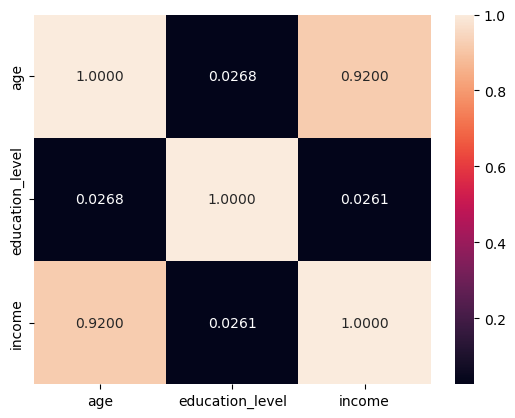

In [10]:
sns.heatmap(df.corr(),annot=True,fmt='.4f')

#### Above matrix shows that Age and Income are highly positively correlated

<AxesSubplot: xlabel='age', ylabel='income'>

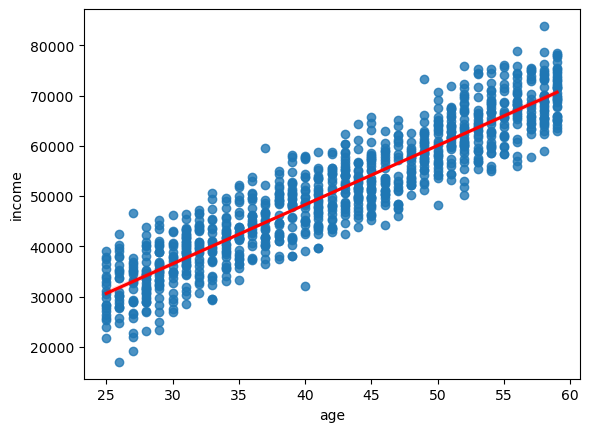

In [ ]:
sns.regplot(data=df, x='age', y='income', line_kws={"color": "red"})

#### In above case for categorical variable ANOVA should be used to get the siginficance of Education Level on Income . Covariance is not a suitable method to check relationship between categorical and numerical variables

### Q6. You are working on a machine learning project with a dataset containing several categorical variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD), and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for each variable, and why?

For the categorical variables "Gender", "Education Level", and "Employment Status" in a machine learning project, there are different encoding methods that could be used depending on the specific algorithm and data preprocessing requirements. Here are some encoding methods that could be used for each variable:

1. Gender: One-Hot Encoding is a good choice for the "Gender" variable because there are only two possible values (Male and Female). One-Hot Encoding creates a binary column for each possible value, where a 1 indicates the presence of that value and 0 indicates its absence. This method is particularly useful when the categorical variable has no order or hierarchy between its possible values.

2. Education Level: Ordinal Encoding or Label Encoding could be used for the "Education Level" variable since there is a natural order between the possible values (High School < Bachelor's < Master's < PhD). Ordinal Encoding assigns a numerical value to each category in a way that preserves the order between them, whereas Label Encoding assigns a numerical value arbitrarily. If the order between categories is important for the machine learning algorithm, then Ordinal Encoding would be a better choice.

3. Employment Status: One-Hot Encoding could be used for the "Employment Status" variable since there are three possible values (Unemployed, Part-Time, Full-Time) and no natural order or hierarchy between them. One-Hot Encoding creates a binary column for each possible value, where a 1 indicates the presence of that value and 0 indicates its absence. This method is particularly useful when the categorical variable has no order or hierarchy between its possible values.

It is important to note that the choice of encoding method should depend on the specific dataset and the requirements of the machine learning algorithm being used. In some cases, it may be necessary to experiment with different encoding methods and evaluate their performance to determine the best approach.

### Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/East/West). Calculate the covariance between each pair of variables and interpret the results.

#### Calculated covariance using pythons numpy library below :

In [12]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(321)

# Generate data
n = 1000
temp = np.random.normal(25, 5, n)
humidity = np.random.normal(60, 10, n)
weather_condition = np.random.choice(['Sunny', 'Cloudy', 'Rainy'], size=n)
wind_direction = np.random.choice(['North', 'South', 'East', 'West'], size=n)

# Create dataframe
df = pd.DataFrame({
    'Temperature': temp, 
    'Humidity': humidity, 
    'Weather Condition': weather_condition, 
    'Wind Direction': wind_direction
})

# Show first few rows
df.head()

,Temperature,Humidity,Weather Condition,Wind Direction
0,25.862597,50.526311,Sunny,South
1,33.177413,55.809608,Sunny,South
2,25.186682,70.091030,Sunny,West
3,20.579252,68.981094,Sunny,South
4,19.284039,78.624127,Rainy,East


#### Calculating Covariance Matrix for Numerical Variables only

In [13]:
df.cov(numeric_only=True)

,Temperature,Humidity
Temperature,25.165416,1.610779
Humidity,1.610779,105.612893


* The covariance between "Temperature" and "Humidity" is 1.611 , indicating a positive relationship between the two variables. This means that as temperature increases, humidity tends to increase as well. The variances of each variable are shown on the diagonal, with Humidity having a larger variance than Temperature.

* To calculate the covariance between the continuous variables and the categorical variables, we can group the data by the categorical variables and calculate the covariance for each group. Here's an example code:

* It is important to note that we cannot calculate the covariance between continuous and categorical variables since covariance requires numerical data. Therefore, we cannot interpret the covariance between "Temperature" and "Weather Condition" or between "Humidity" and "Wind Direction". In general, we need to be careful when interpreting covariance and consider the nature of the variables being analyzed.

* ANOVA Should be used to compare significance of Categorical variables with Numeric Variables